In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [2]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

mean_metric_name = "max_performance"
task = "retina"
num_layers = '3'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/{num_layers}_layers/"

In [3]:
csv_name_big = f'dynamic_retina_{num_layers}_layers/2023-08-15-11-09-19_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv'
result_df_big = pd.read_csv(f"{results_path}/{csv_name_big}")

In [4]:
result_df_big_no_outliers = result_df_big[
    result_df_big['mean_performance'].between(result_df_big['mean_performance'].quantile(0.01),
                                              result_df_big['mean_performance'].quantile(0.99))].rename(
    columns={'connectivity_ratio': 'density'}).sort_values('mean_performance', ascending=False)
result_df_big_no_outliers['sum_normalized_motifs_count'] = result_df_big_no_outliers['normalized_motifs_count_0'] + \
                                                           result_df_big_no_outliers['normalized_motifs_count_1'] + \
                                                           result_df_big_no_outliers['normalized_motifs_count_2']

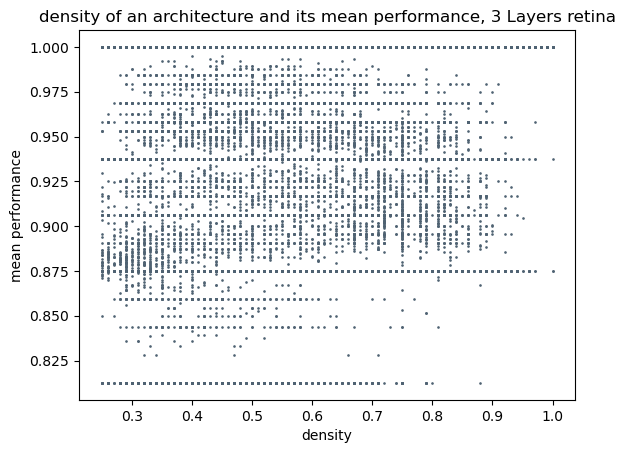

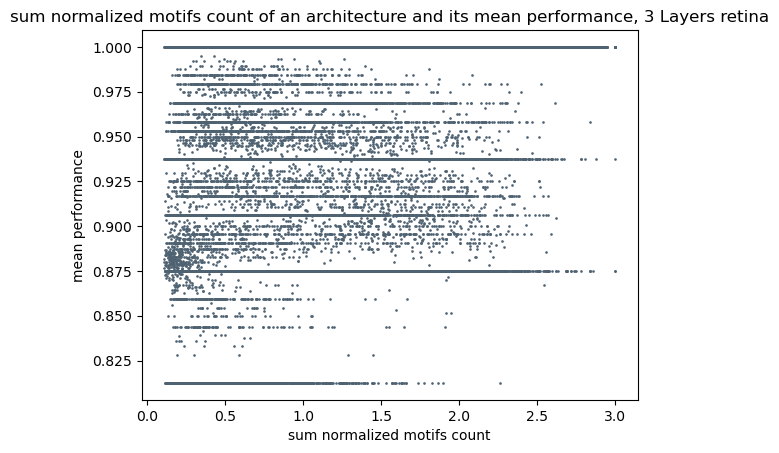

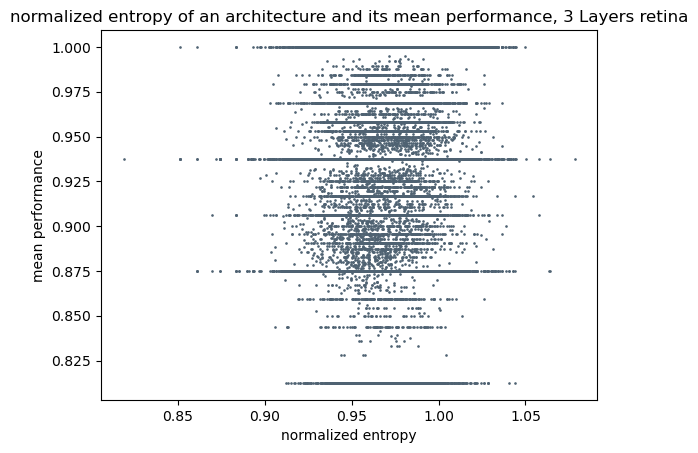

In [6]:
for x_metric_name, y_metric_name in [
    ('density', 'mean_performance'),
    ('sum_normalized_motifs_count', 'mean_performance'),
    ('normalized_entropy', 'mean_performance'),
]:
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=result_df_big_no_outliers,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

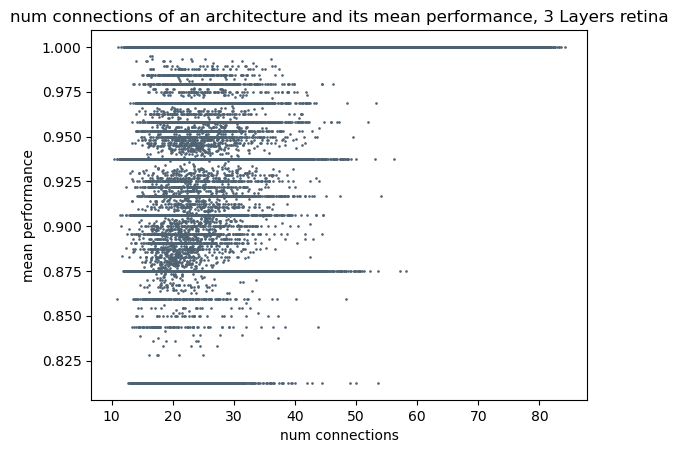

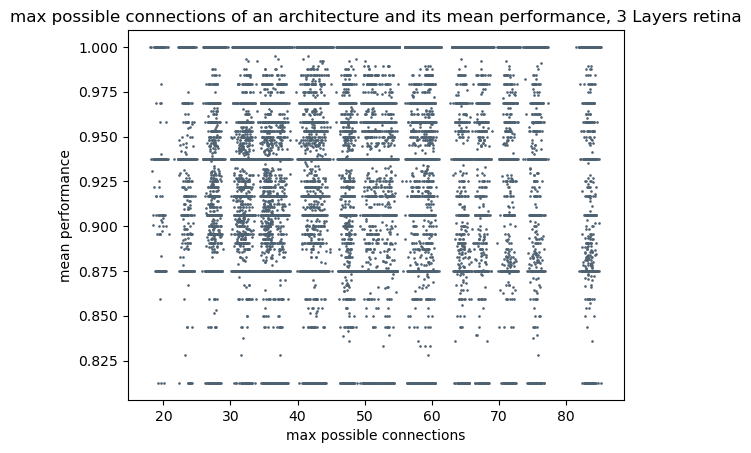

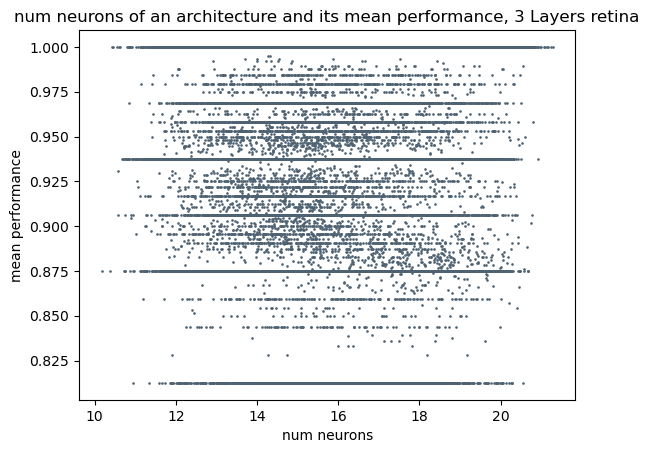

In [7]:
for x_metric_name, y_metric_name in [
    ('num_connections', 'mean_performance'),
    ('max_possible_connections', 'mean_performance'),
    ('num_neurons', 'mean_performance'),
]:
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=result_df_big_no_outliers,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
        gitter=True
    )

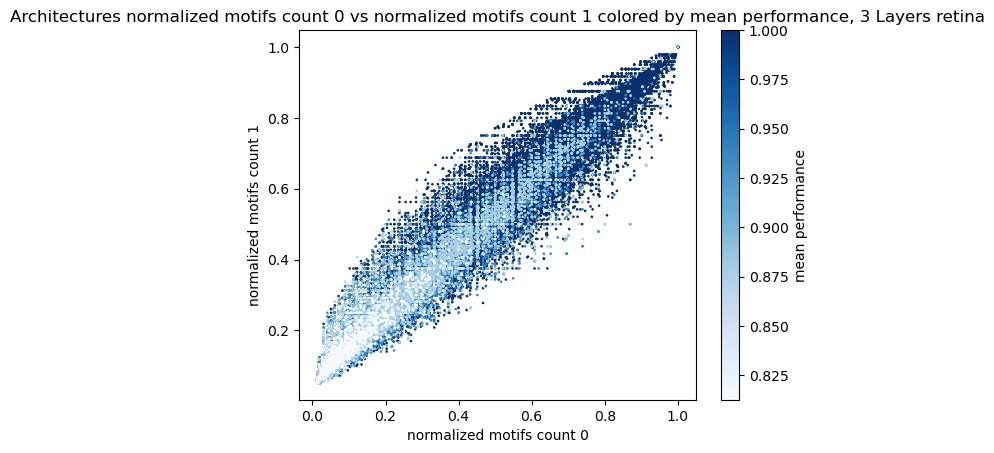

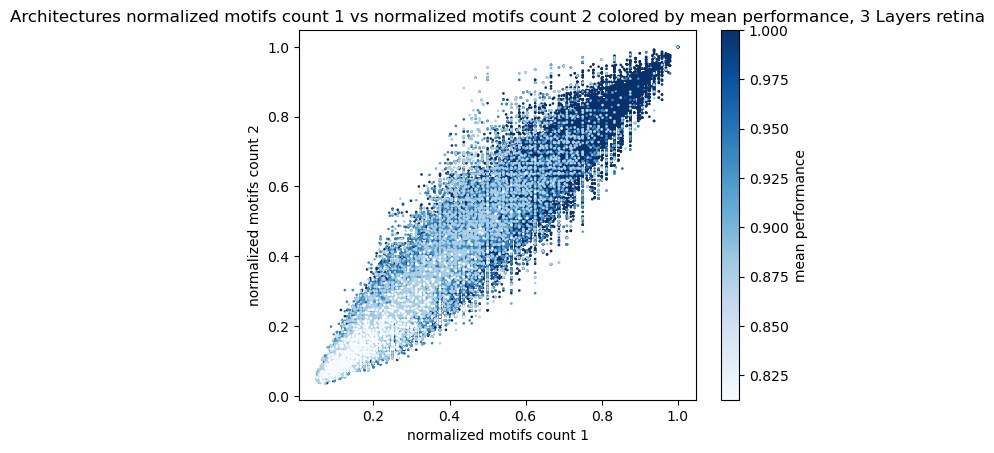

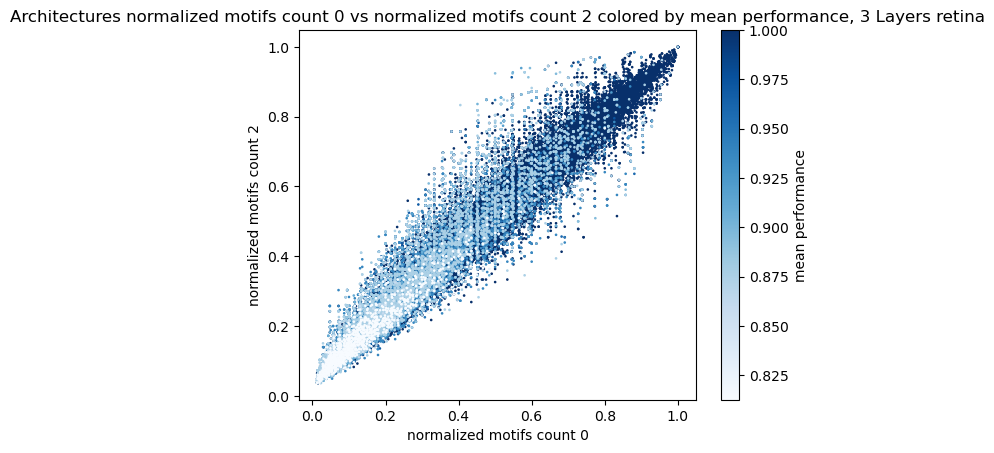

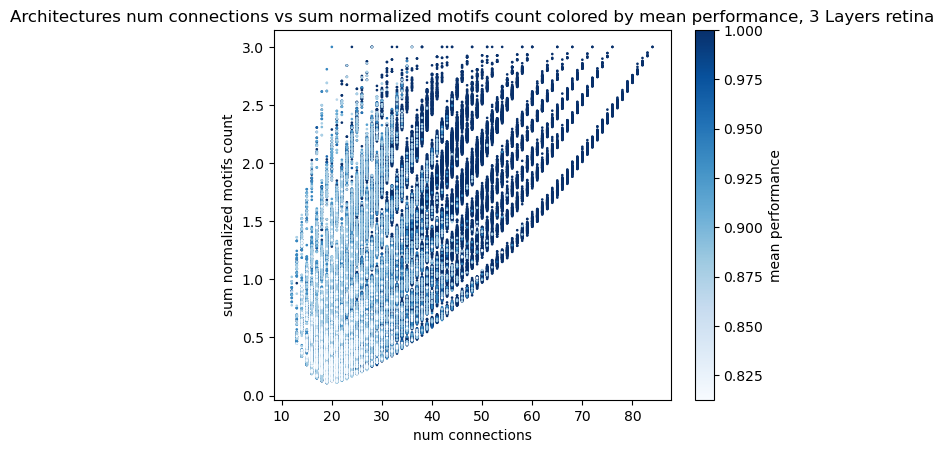

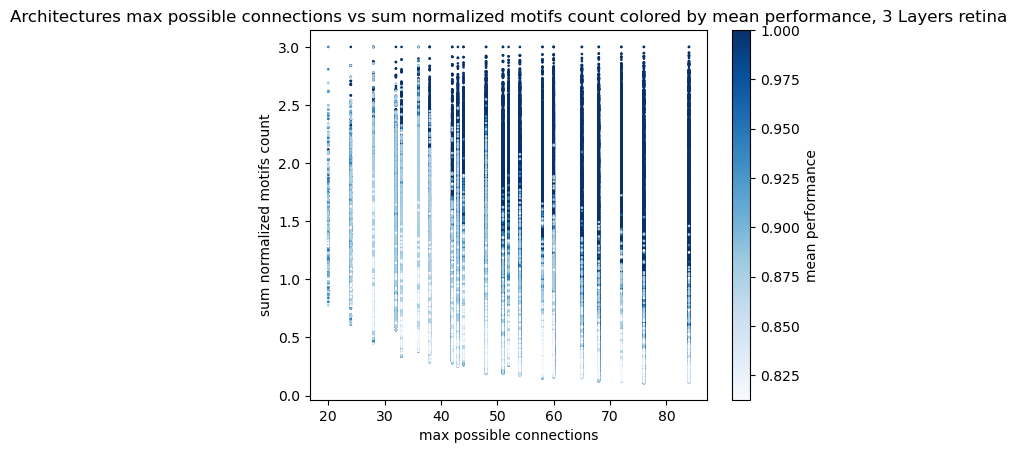

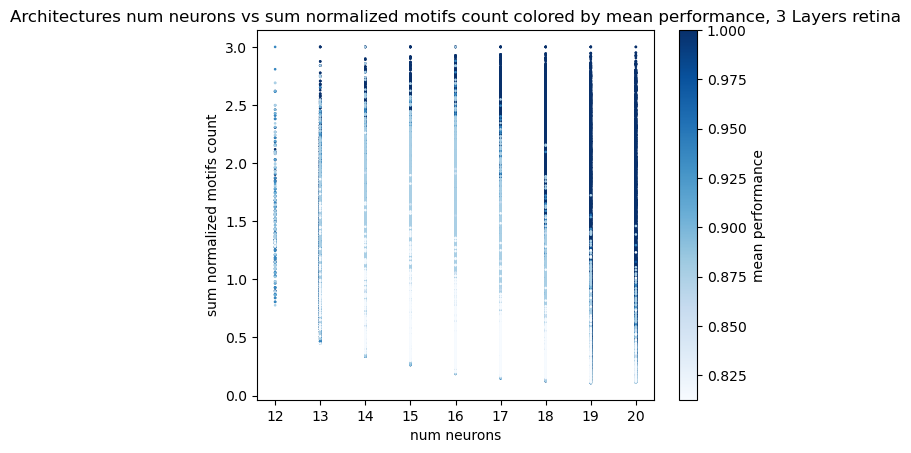

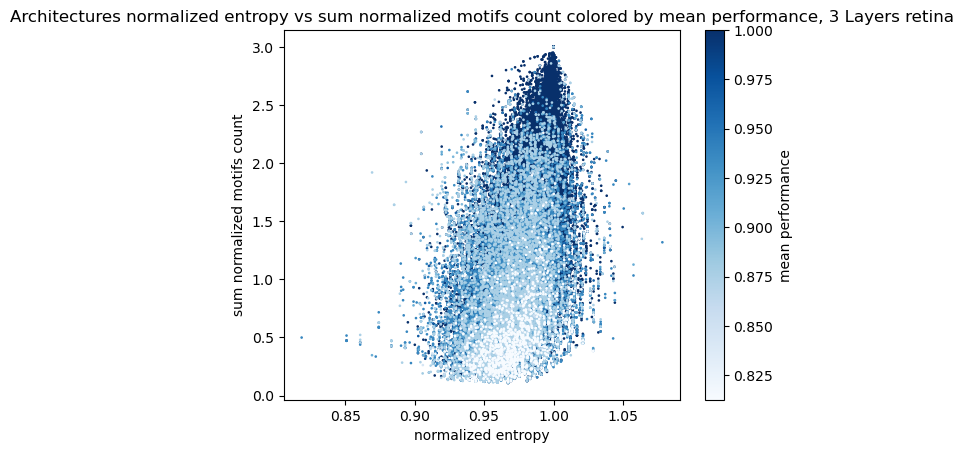

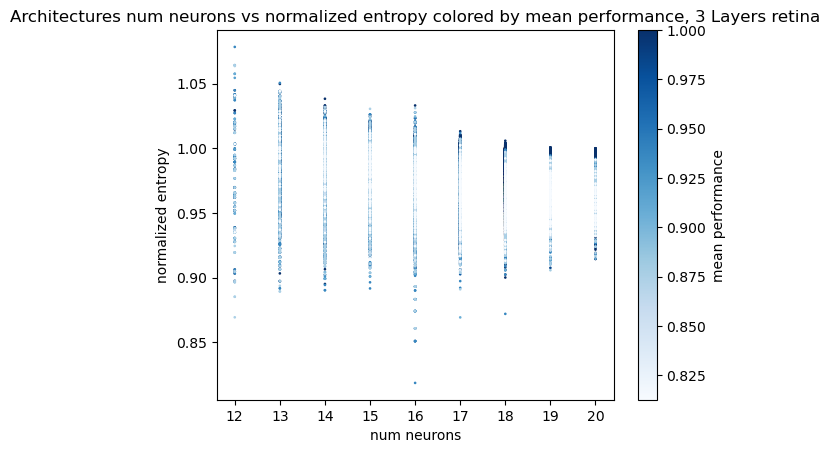

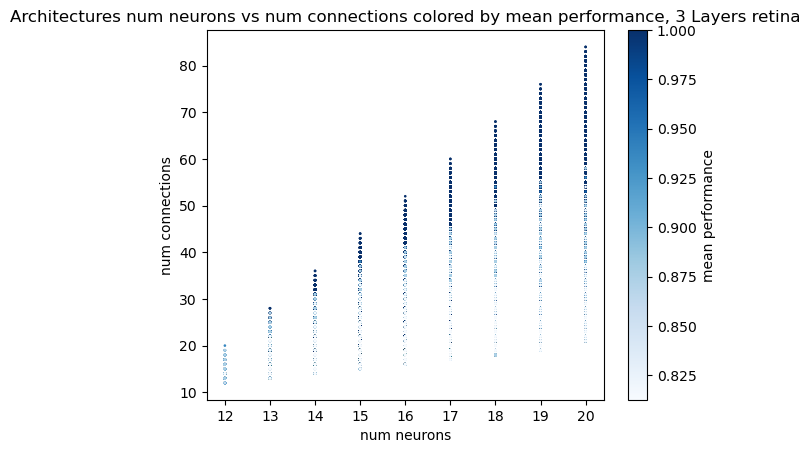

In [10]:

for (x_metric_name, y_metric_name, colored_metric_name) in [
    ('normalized_motifs_count_0', 'normalized_motifs_count_1', 'mean_performance'),
    ('normalized_motifs_count_1', 'normalized_motifs_count_2', 'mean_performance'),
    ('normalized_motifs_count_0', 'normalized_motifs_count_2', 'mean_performance'),
    ('num_connections', 'sum_normalized_motifs_count', 'mean_performance'),
    ('max_possible_connections', 'sum_normalized_motifs_count', 'mean_performance'),
    ('num_neurons', 'sum_normalized_motifs_count', 'mean_performance'),
    ('normalized_entropy', 'sum_normalized_motifs_count', 'mean_performance'),
    ('num_neurons', 'normalized_entropy', 'mean_performance'),
    ('num_neurons', 'num_connections', 'mean_performance'),
]:
    plot_two_metrics_vs_colored_metric(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        colored_metric_name=colored_metric_name,
        result_df=result_df_big_no_outliers,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

In [9]:
result_df_big.columns


Index(['Unnamed: 0', 'exp_name', 'modularity', 'entropy', 'normed_entropy',
       'num_connections', 'median_performance', 'mean_performance',
       'max_performance', 'performance_std', 'connectivity_ratio',
       'num_successes_1.0', 'success_percent_1.0', 'motifs_count_0',
       'motifs_count_1', 'motifs_count_2', 'normalized_motifs_count_0',
       'normalized_motifs_count_1', 'normalized_motifs_count_2',
       'neurons_in_layer_0', 'neurons_in_layer_1', 'neurons_in_layer_2',
       'neurons_in_layer_3', 'num_layers', 'num_neurons',
       'max_possible_connections', 'normalized_entropy',
       'normalized_normed_entropy'],
      dtype='object')

In [19]:
result_df_big_no_outliers_3_4 = result_df_big_no_outliers[result_df_big_no_outliers['neurons_in_layer_1'] == 2][
    result_df_big_no_outliers['neurons_in_layer_2'] == 3]

/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_64314/1977237208.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_df_big_no_outliers_3_4 = result_df_big_no_outliers[result_df_big_no_outliers['neurons_in_layer_1']==2][result_df_big_no_outliers['neurons_in_layer_2']==3]


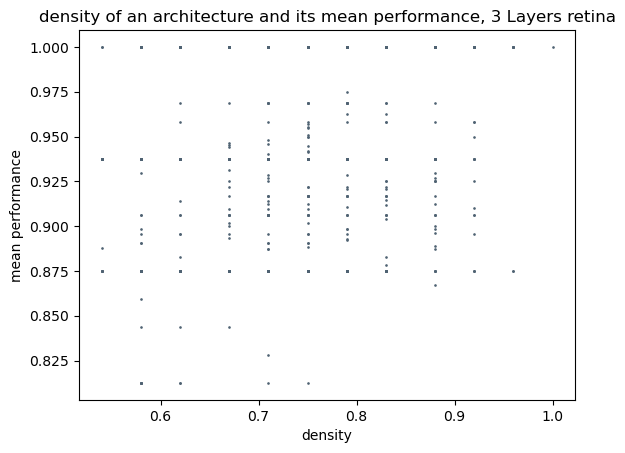

In [20]:
plot_two_metrics(
    x_metric_name='density',
    y_metric_name='mean_performance',
    result_df=result_df_big_no_outliers_3_4,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    name_addition='_multi_archs',
    title_addition=f'{num_layers} Layers ',
    mark_size=0.8,
)

In [21]:
for i in range(2, 7):
    for j in range(2, 7):
        print(
            f"{i}, {j}: {result_df_big_no_outliers[result_df_big_no_outliers['neurons_in_layer_1'] == i][result_df_big_no_outliers['neurons_in_layer_2'] == j].shape}")

2, 2: (259, 29)
2, 3: (910, 29)
2, 4: (1619, 29)
2, 5: (2122, 29)
2, 6: (2547, 29)
3, 2: (2718, 29)
3, 3: (3697, 29)
3, 4: (4007, 29)
3, 5: (4235, 29)
3, 6: (4278, 29)
4, 2: (3892, 29)
4, 3: (4408, 29)
4, 4: (4784, 29)
4, 5: (4710, 29)
4, 6: (4838, 29)
5, 2: (4483, 29)
5, 3: (4757, 29)
5, 4: (4923, 29)
5, 5: (5085, 29)
5, 6: (5037, 29)
6, 2: (4652, 29)
6, 3: (4923, 29)
6, 4: (5077, 29)
6, 5: (5078, 29)
6, 6: (5166, 29)


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_64314/3614218859.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"{i}, {j}: {result_df_big_no_outliers[result_df_big_no_outliers['neurons_in_layer_1']==i][result_df_big_no_outliers['neurons_in_layer_2']==j].shape}")
